In [10]:
import numpy as np

def generate_kernel(dim, n_points):
    points = np.random.rand(dim, n_points)
    X = points.T @ points
    return X

In [11]:
def get_approximation(A, r):
    U, S, Vh = np.linalg.svd(A, full_matrices=True)
    return U[:, :r] @ np.diag(S[:r]) @ Vh[:r, :]

In [12]:
def estimate_C_using_A_approximation(m, r):
    X = generate_kernel(10, 100)
    A = X[:m, :m]
    B = X[:m, m:]
    C = X[m:, m:]
    A_tilda = get_approximation(A, r)
    C_tilda = B.T @ np.linalg.pinv(A_tilda) @ B
    eps = np.linalg.norm(C - C_tilda, ord='fro')
    return eps / np.linalg.norm(C, ord='fro')

In [13]:
import matplotlib.pyplot as plt

def plot_nystrom_error(m, r):
    results = [estimate_C_using_A_approximation(m, r) for _ in range(100)]

    plt.plot(results)
    plt.title(f'Nystrom Error for m={m} r={r}')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.show()

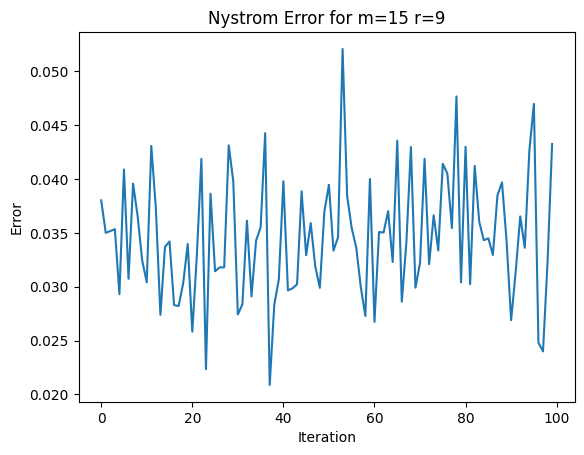

In [17]:
plot_nystrom_error(15, 9)